# Evaluation of Generated Texts

In this notebook, we evaluate the generated plain language summaries using BERTScore and other metrics. We compare the generated summaries against ground truth summaries to measure the quality and accuracy of the generated texts.

In [ ]:
import requests
import os
import pandas as pd
import numpy as npx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from evaluate import load

In [ ]:
bertscore = load("bertscore")
bleu = load("bleu")
rouge = load("rouge")

In [ ]:
folder_path_ground_truth = "/content/drive/MyDrive/output_ppls/ground_truth"
folder_path_gpt_35 = "/content/drive/MyDrive/output_ppls/gpt_35"
folder_path_gpt_4 = "/content/drive/MyDrive/output_ppls/gpt_4"

def read_texts_from_folder(folder_path):
    files = os.listdir(folder_path)
    texts = []
    for file in files:
        try:
            with open(os.path.join(folder_path, file), 'r', encoding="utf-8") as f:
                texts.append(f.read())
        except UnicodeDecodeError:
            try:
                with open(os.path.join(folder_path, file), 'r', encoding="cp1252") as f:
                    texts.append(f.read())
            except UnicodeDecodeError as e:
                print(f"Error decoding {file}: {e}")
                # O manejar el error de alguna otra manera
    return texts

# Ahora, usa la función para leer los textos
texts_ground_truth = read_texts_from_folder(folder_path_ground_truth)
texts_gpt_35 = read_texts_from_folder(folder_path_gpt_35)
texts_gpt_4 = read_texts_from_folder(folder_path_gpt_4)

In [ ]:
len(texts_gpt_4)

9

In [ ]:
len(texts_gpt_35)

9

In [ ]:
len(texts_ground_truth)

9

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
import gc
del results
gc.collect()

408

In [ ]:
texts_ground_truth[0]

'Long Term Safety of Anifrolumab in Adult Subjects With Active Systemic Lupus Erythematosus. Researchers are looking for a better way to treat lupus in adults. Researchers do clinical trials to find out how treatments work and how safe they are. Lupus is a long-term disease of the immune system, which is the body’s natural defense system against things like viruses and bacteria. In people with lupus, the immune system mistakenly attacks healthy tissues of the body. This leads to symptoms such as skin rashes, tiredness, and inflammation, which causes swollen and painful joints and muscles. Lupus can also lead to more serious problems such as heart, lung, or brain damage. Researchers think that specific proteins in the body called type 1 interferons are involved in the inflammation caused by lupus. The trial treatment, anifrolumab, was designed to stop type 1 interferons from activating the immune system. Researchers think that this could reduce inflammation in people with lupus. Anifrol

In [ ]:
results = {}

In [ ]:
results = {}
r_gpt4 = f"allenai/longformer-large-4096-finetuned-triviaqa_gpt4"
r_gpt35 = f"allenai/longformer-large-4096-finetuned-triviaqa_gpt35"
results[r_gpt35] = bertscore.compute(
    predictions=texts_gpt_35,
    references=texts_ground_truth,
    model_type="allenai/longformer-large-4096-finetuned-triviaqa"
)
results[r_gpt4] = bertscore.compute(
    predictions=texts_gpt_4,
    references=texts_ground_truth,
    model_type="allenai/longformer-large-4096-finetuned-triviaqa"
    )

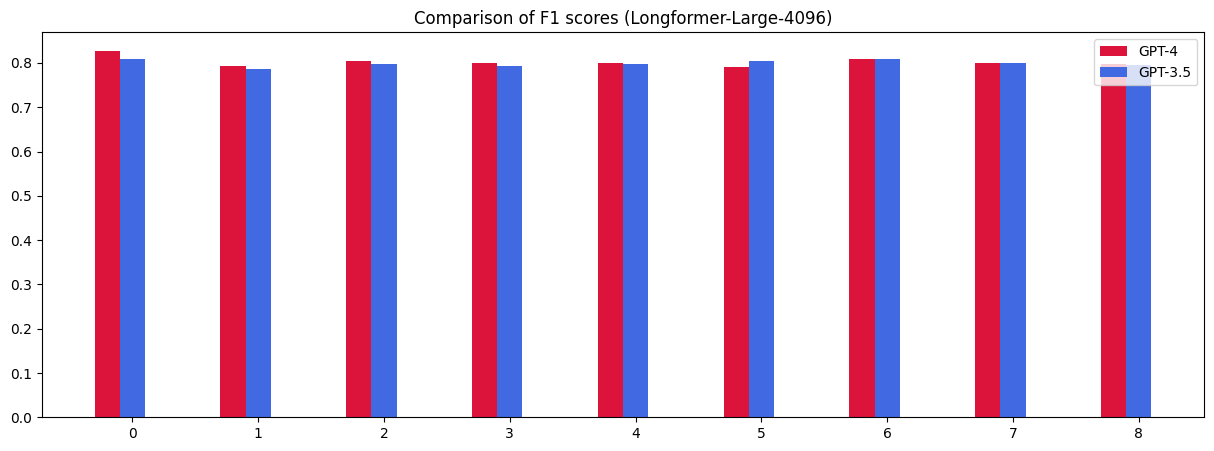

In [ ]:
# Plot f1 score
f1_scores = results[r_gpt4]["f1"]
f1_scores_gpt_35 = results[r_gpt35]["f1"]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(f1_scores))

ax.bar(x, f1_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], f1_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(f1_scores))])
ax.set_title("Comparison of F1 scores (Longformer-Large-4096)")
ax.legend()

plt.show()

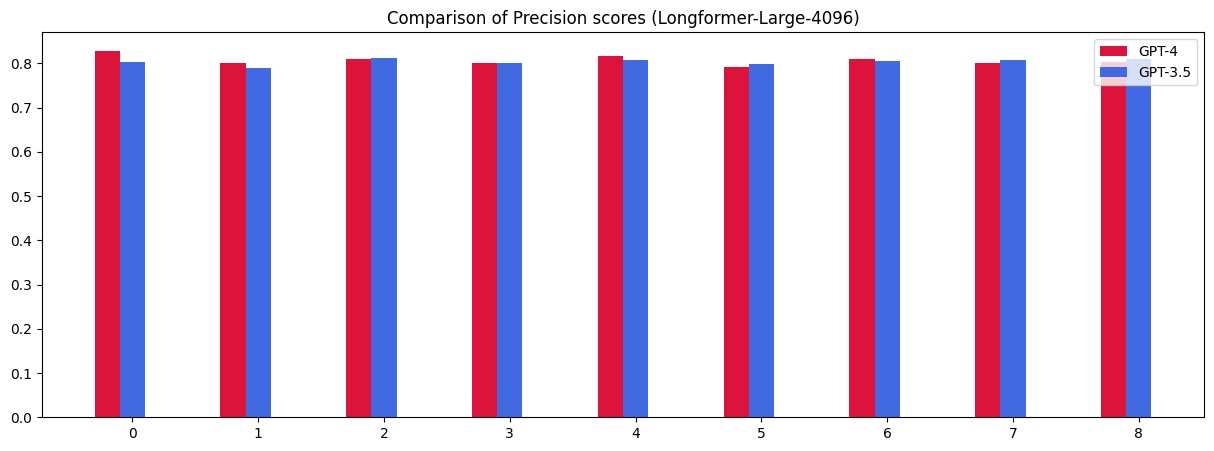

In [ ]:
# Plot f1 score
precision_scores = results[r_gpt4]["precision"]
precision_scores_gpt_35 = results[r_gpt35]["precision"]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(precision_scores))

ax.bar(x, precision_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], precision_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(precision_scores))])
ax.set_title("Comparison of Precision scores (Longformer-Large-4096)")
ax.legend()

plt.show()

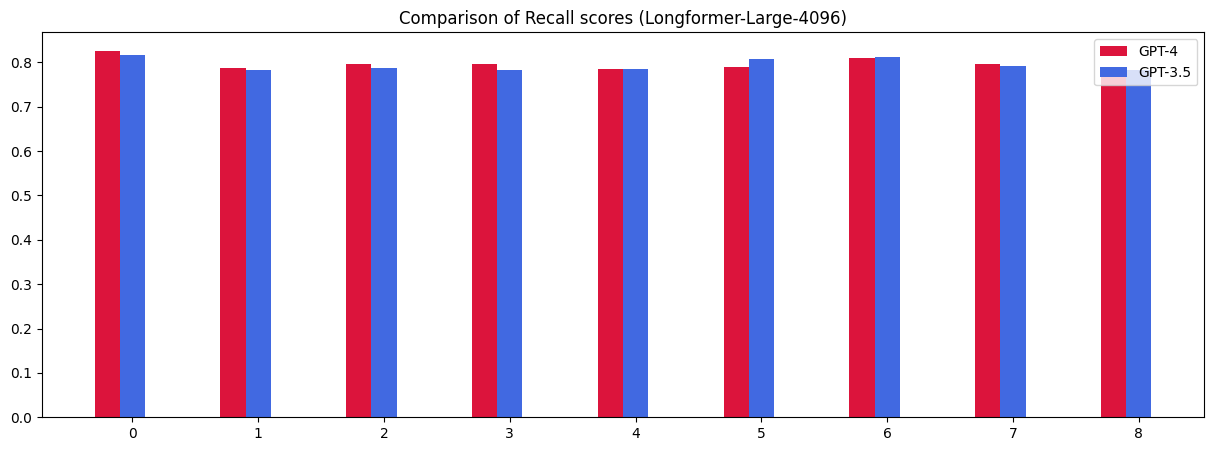

In [ ]:
# Plot f1 score
recall_scores = results[r_gpt4]["recall"]
recall_scores_gpt_35 = results[r_gpt35]["recall"]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(recall_scores))

ax.bar(x, recall_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], recall_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(recall_scores))])
ax.set_title("Comparison of Recall scores (Longformer-Large-4096)")
ax.legend()

plt.show()

In [ ]:
import json
with open('results_ppls_gpt_4.json', 'w') as f:
    json.dump(results[r_gpt4], f)

with open('results_ppls_gpt_35.json', 'w') as f:
    json.dump(results[r_gpt35], f)

In [ ]:
results_bleu = {}
r_gpt4 = f"gpt4"
r_gpt35 = f"gpt35"
results_bleu[r_gpt4] = []
results_bleu[r_gpt35] = []
n = 0
for i in range(len(texts_ground_truth)):
  results_bleu[r_gpt35].append(bleu.compute(
    predictions=[texts_gpt_35[i]],
    references=[texts_ground_truth[i]])["precisions"][n])
  results_bleu[r_gpt4].append(bleu.compute(
      predictions=[texts_gpt_4[i]],
      references=[texts_ground_truth[i]])["precisions"][n])

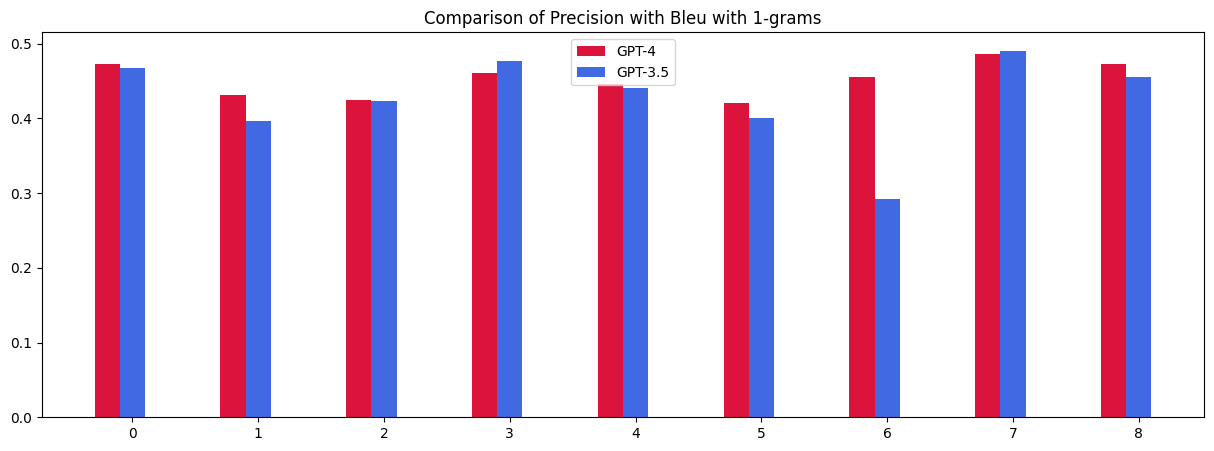

In [ ]:
# Plot f1 score
bleu_scores = results_bleu[r_gpt4]
bleu_scores_gpt_35 = results_bleu[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(bleu_scores))

ax.bar(x, bleu_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], bleu_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(bleu_scores))])
ax.set_title(f"Comparison of Precision with Bleu with {n+1}-grams")
ax.legend()

plt.show()

In [ ]:
results_rouge = {}
r_gpt4 = f"gpt4"
r_gpt35 = f"gpt35"
results_rouge[r_gpt4] = []
results_rouge[r_gpt35] = []
n = 1
for i in range(len(texts_ground_truth)):
  results_rouge[r_gpt35].append(rouge.compute(
    predictions=[texts_gpt_35[i]],
    references=[texts_ground_truth[i]])["rougeL"])
  results_rouge[r_gpt4].append(rouge.compute(
      predictions=[texts_gpt_4[i]],
      references=[texts_ground_truth[i]])["rougeL"])

In [ ]:
results_rouge

{'gpt4': [0.21785714285714286,
  0.18674698795180725,
  0.18903150525087517,
  0.3473774720550301,
  0.1898989898989899,
  0.21710526315789475,
  0.2988721804511278,
  0.323062558356676,
  0.20722433460076045],
 'gpt35': [0.2323049001814882,
  0.19002822201317027,
  0.17206982543640897,
  0.32805219012115566,
  0.19762122598353155,
  0.2321618743343983,
  0.3086269744835966,
  0.30474268415741673,
  0.18965517241379312]}

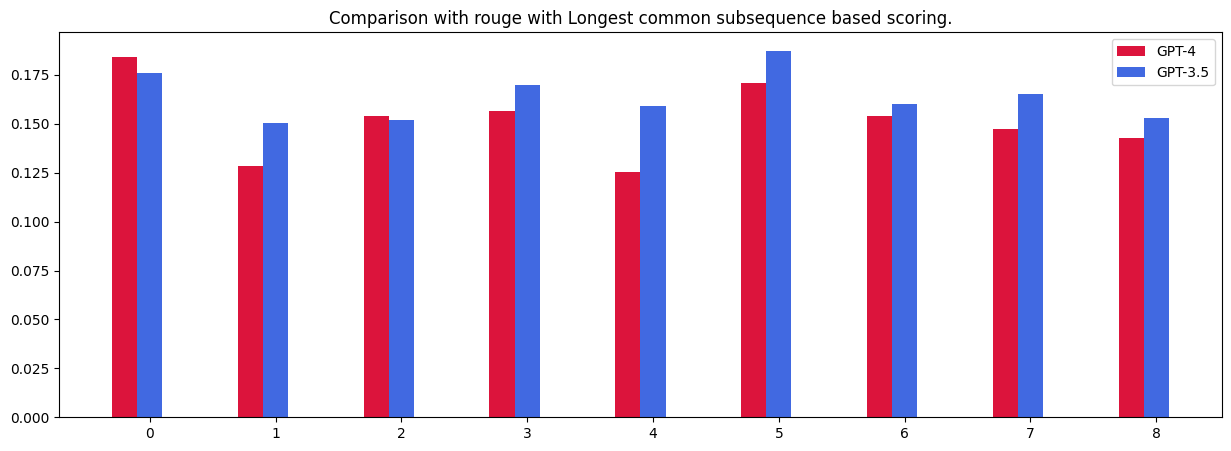

In [ ]:
# Plot f1 score
rouge_scores = results_rouge[r_gpt4]
rouge_scores_gpt_35 = results_rouge[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(rouge_scores))

ax.bar(x, rouge_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], rouge_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(rouge_scores))])
ax.set_title(f"Comparison with rouge with Longest common subsequence based scoring.")
ax.legend()

plt.show()

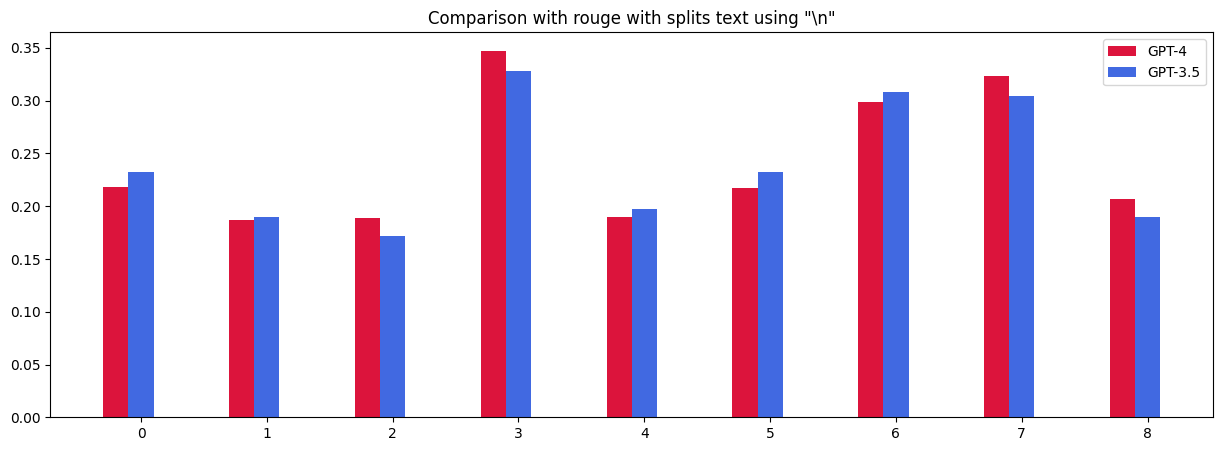

In [ ]:
# Plot f1 score
rouge_scores = results_rouge[r_gpt4]
rouge_scores_gpt_35 = results_rouge[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(rouge_scores))

ax.bar(x, rouge_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], rouge_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(rouge_scores))])
ax.set_title(f"Comparison with rouge with splits text using \"\\n\"")
ax.legend()

plt.show()

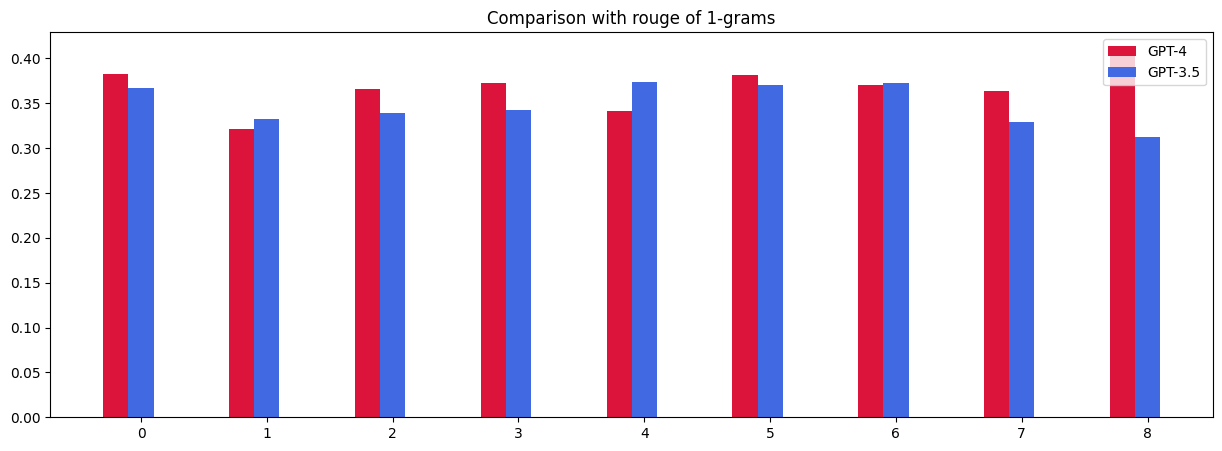

In [ ]:
# Plot f1 score
rouge_scores = results_rouge[r_gpt4]
rouge_scores_gpt_35 = results_rouge[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(rouge_scores))

ax.bar(x, rouge_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], rouge_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(rouge_scores))])
ax.set_title(f"Comparison with rouge of {n+1}-grams")
ax.legend()

plt.show()

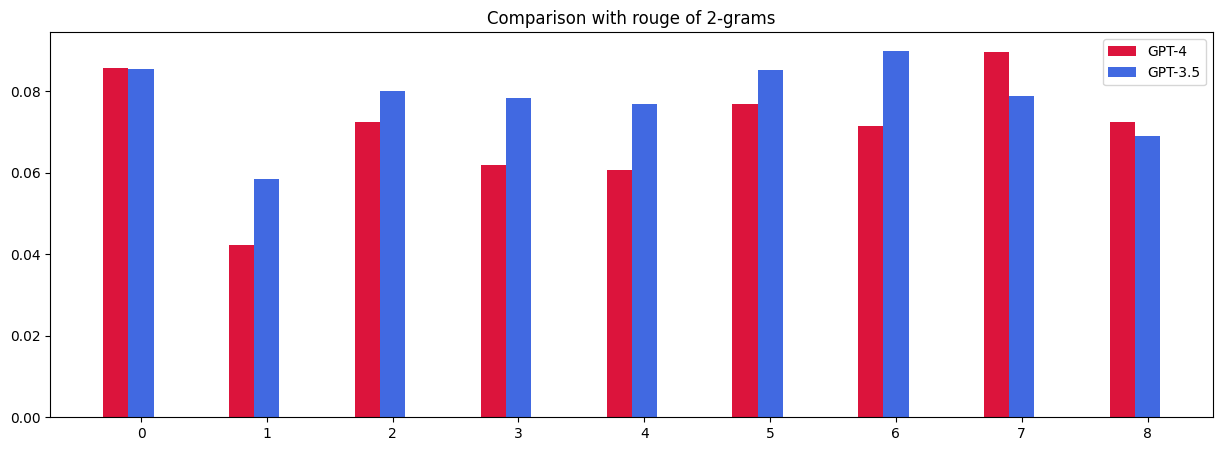

In [ ]:
# Plot f1 score
rouge_scores = results_rouge[r_gpt4]
rouge_scores_gpt_35 = results_rouge[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(rouge_scores))

ax.bar(x, rouge_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], rouge_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(rouge_scores))])
ax.set_title(f"Comparison with rouge of {n+1}-grams")
ax.legend()

plt.show()